In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## algorithm

In [2]:
def ford_fulkerson(graph, source, sink, debug=None):
    flow, path = 0, True
    
    while path:
        # search for path with flow reserve
        path, reserve = depth_first_search(graph, source, sink)
        flow += reserve

        # increase flow along the path
        for v, u in zip(path, path[1:]):
            if graph.has_edge(v, u):
                graph[v][u]['flow'] += reserve
            else:
                graph[u][v]['flow'] -= reserve
        
        # show intermediate results
        if callable(debug):
            debug(graph, path, reserve, flow)

In [3]:
def depth_first_search(graph, source, sink):
    undirected = graph.to_undirected()
    explored = {source}
    stack = [(source, 0, undirected[source])]
    
    while stack:
        v, _, neighbours = stack[-1]
        if v == sink:
            break
        
        # search the next neighbour
        while neighbours:
            u, e = neighbours.popitem()
            if u not in explored:
                break
        else:
            stack.pop()
            continue
        
        # current flow and capacity
        in_direction = graph.has_edge(v, u)
        capacity = e['capacity']
        flow = e['flow']

        # increase or redirect flow at the edge
        if in_direction and flow < capacity:
            stack.append((u, capacity - flow, undirected[u]))
            explored.add(u)
        elif not in_direction and flow:
            stack.append((u, flow, undirected[u]))
            explored.add(u)

    # (source, sink) path and its flow reserve
    reserve = min((f for _, f, _ in stack[1:]), default=0)
    path = [v for v, _, _ in stack]
    
    return path, reserve

## graph

In [4]:
graph = nx.DiGraph()
graph.add_nodes_from('ABCDEFGH')
graph.add_edges_from([
    ('A', 'B', {'capacity': 4, 'flow': 0}),
    ('A', 'C', {'capacity': 5, 'flow': 0}),
    ('A', 'D', {'capacity': 7, 'flow': 0}),
    ('B', 'E', {'capacity': 7, 'flow': 0}),
    ('C', 'E', {'capacity': 6, 'flow': 0}),
    ('C', 'F', {'capacity': 4, 'flow': 0}),
    ('C', 'G', {'capacity': 1, 'flow': 0}),
    ('D', 'F', {'capacity': 8, 'flow': 0}),
    ('D', 'G', {'capacity': 1, 'flow': 0}),
    ('E', 'H', {'capacity': 7, 'flow': 0}),
    ('F', 'H', {'capacity': 6, 'flow': 0}),
    ('G', 'H', {'capacity': 4, 'flow': 0}),
])

In [5]:
layout = {
    'A': [0, 1], 'B': [1, 2], 'C': [1, 1], 'D': [1, 0],
    'E': [2, 2], 'F': [2, 1], 'G': [2, 0], 'H': [3, 1],
}

In [6]:
def draw_graph():
    plt.figure(figsize=(12, 4))
    plt.axis('off')

    nx.draw_networkx_nodes(graph, layout, node_color='steelblue', node_size=600)
    nx.draw_networkx_edges(graph, layout, edge_color='gray')
    nx.draw_networkx_labels(graph, layout, font_color='white')

    for u, v, e in graph.edges(data=True):
        label = '{}/{}'.format(e['flow'], e['capacity'])
        color = 'green' if e['flow'] < e['capacity'] else 'red'
        x = layout[u][0] * .6 + layout[v][0] * .4
        y = layout[u][1] * .6 + layout[v][1] * .4
        t = plt.text(x, y, label, size=16, color=color, 
                     horizontalalignment='center', verticalalignment='center')
        
    plt.show()

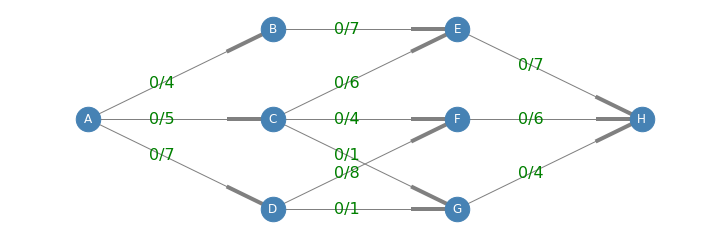

In [7]:
draw_graph()

## run

In [8]:
def flow_debug(graph, path, reserve, flow):
    print('flow increased by', reserve, 
          'at path', path,
          '; current flow', flow)
    draw_graph()

flow increased by 1 at path ['A', 'D', 'G', 'H'] ; current flow 1


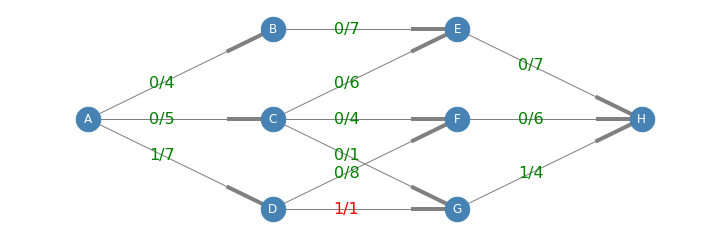

flow increased by 6 at path ['A', 'D', 'F', 'H'] ; current flow 7


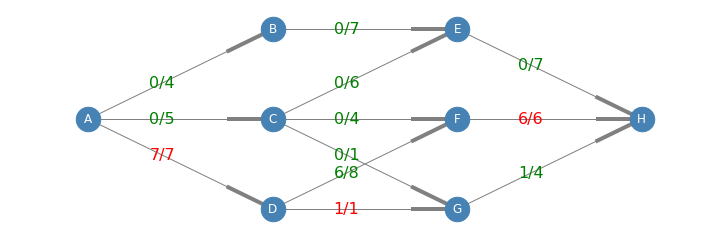

flow increased by 1 at path ['A', 'C', 'G', 'H'] ; current flow 8


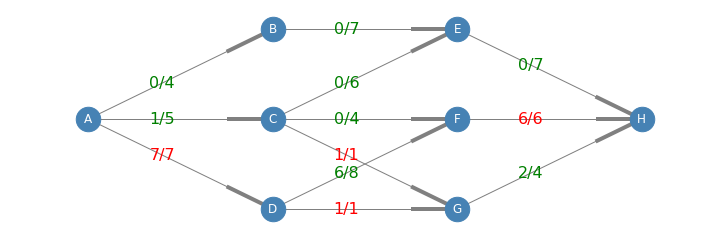

flow increased by 4 at path ['A', 'C', 'E', 'H'] ; current flow 12


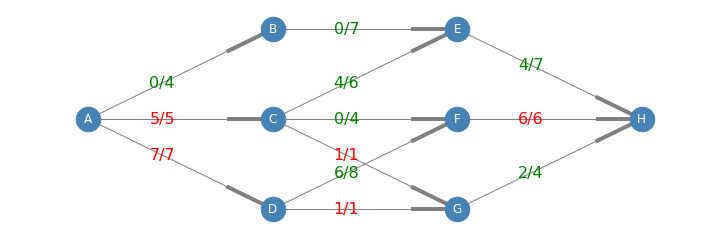

flow increased by 3 at path ['A', 'B', 'E', 'H'] ; current flow 15


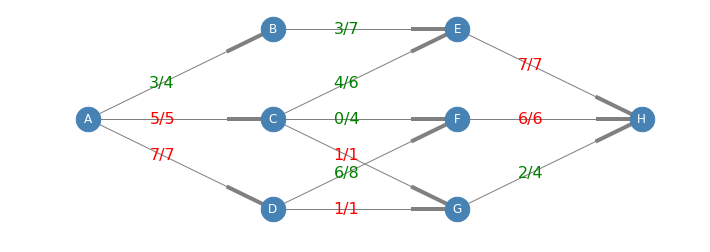

flow increased by 0 at path [] ; current flow 15


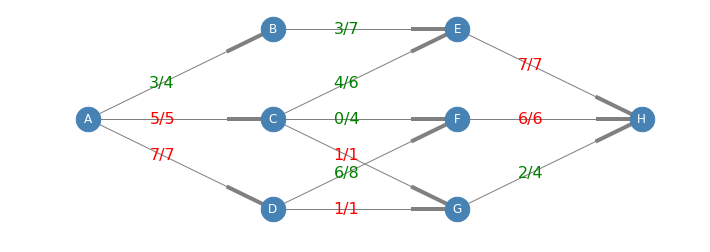

In [9]:
ford_fulkerson(graph, 'A', 'H', flow_debug)